# Computing persistent Stiefel-Whitney classes of line bundles: experiments

Raphaël Tinarrage, https://raphaeltinarrage.github.io/
<br/>
March 2021

This page gathers the experiments presented in our paper *Computing persistent Stiefel-Whitney classes of line bundles* https://arxiv.org/abs/2005.12543.

The last cells of this notebook contain code to generate the datasets. They should be saved in the subfolder *./Experiments*.

In [1]:
import velour
import gudhi 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# First dataset: giraffe on a circle

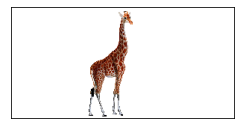

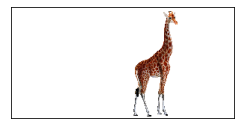

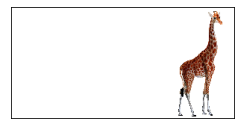

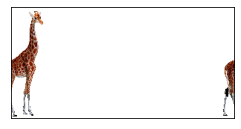

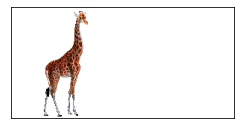

In [2]:
# Open dataset

X = np.load('Experiments/giraffe.npy')
shape = tuple([150, 300, 3])
y = shape[0]; x = shape[1]
N = 150

# Plot some images of the dataset

for i in np.linspace(0, N, 6)[:-1]:
    i = int(i)
    plt.figure(figsize=(4,4))
    plt.imshow(X[i].reshape(shape))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)

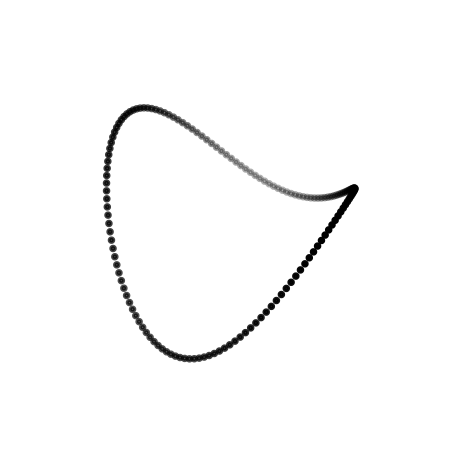

In [3]:
# PCA reduction

n_components = 3
pca = PCA(n_components=n_components)

pca.fit(X)
X_pca = pca.transform(X)

# Normalize dataset

maximum = max([np.linalg.norm(X_pca[i]) for i in range(N)])
X_pca = X_pca/maximum

# Plot dataset

velour.PlotPointCloud(X_pca)

Rips Complex is of dimension 2 - 562625 simplices - 150 vertices. Filtration maximal value is 1.


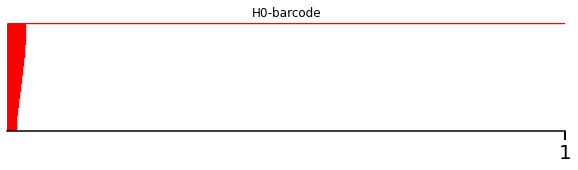

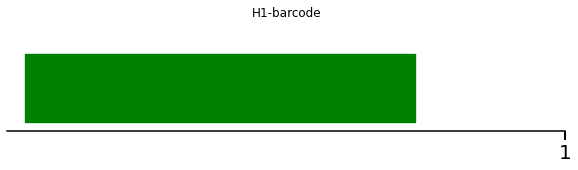

In [4]:
# Rips filtration

tmax = 1
dimension_max = 2  
st = velour.RipsComplex(X_pca, filtration_max = tmax, dimension_max = dimension_max)  
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.01, homology_coeff_field=2, xticks = [tmax])        

## First vector bundle: normal bundle

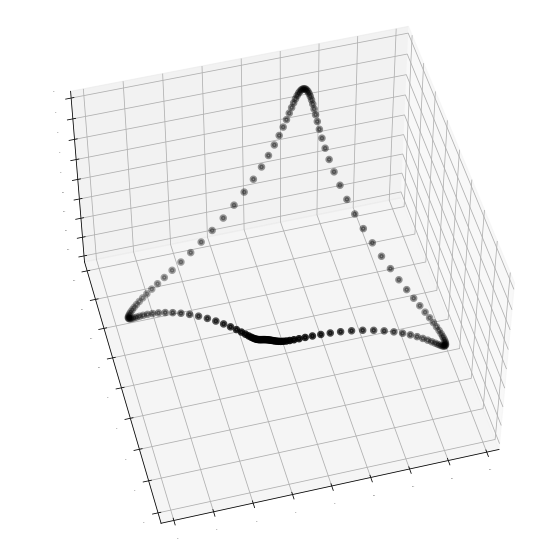

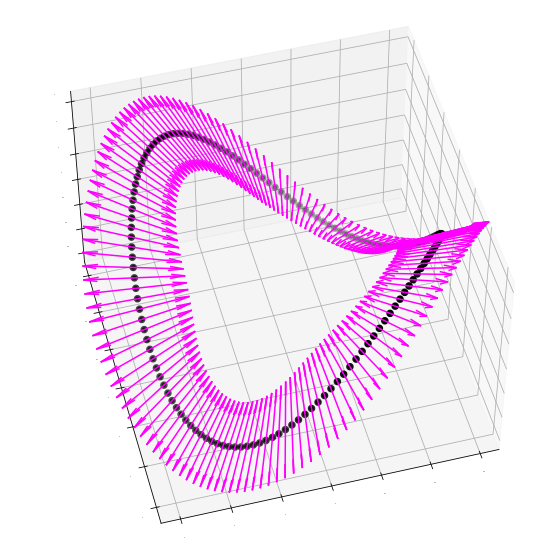

In [5]:
# Normal bundle

gamma = 1

Tangent = np.zeros((N,np.shape(X_pca)[1]**2))
for i in range(0,N):
    v = X_pca[i]
    v = v/np.linalg.norm(v)
    proj = velour.np.outer(v,v)
    Tangent[i] = proj.flatten()

Bundle = np.zeros((N, np.shape(X_pca)[1]+np.shape(X_pca)[1]**2))
for i in range(N):
    Bundle[i,:] = np.concatenate((X_pca[i], gamma*Tangent[i]))
    
# Plot bundle

velour.PlotPCA(Bundle)
velour.PlotVectorField(Bundle*2)

Rips Complex is of dimension 2 - 350978 simplices - 150 vertices. Filtration maximal value is 1.
Filtration maximal value is 0.4999998935178588.
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 16824 simplices - 158 vertices.


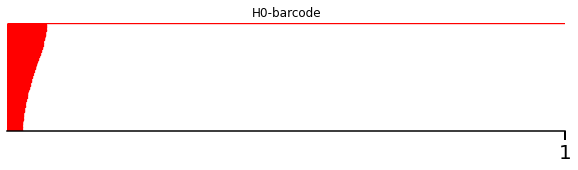

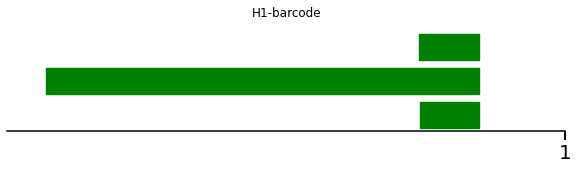

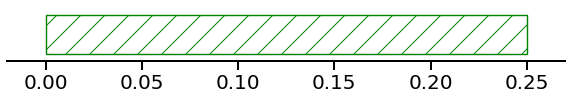

In [6]:
# Rips filtration

tmax = 1
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max)  
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.01, homology_coeff_field=2, xticks = [tmax]) 

# Persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*5/10
Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max) 
velour.PlotLifebar(Lifebar, filtration_max)   

## Second vector bundle: tangent bundle

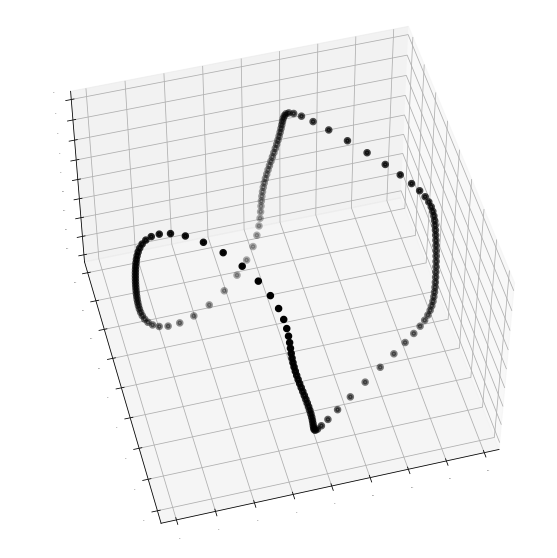

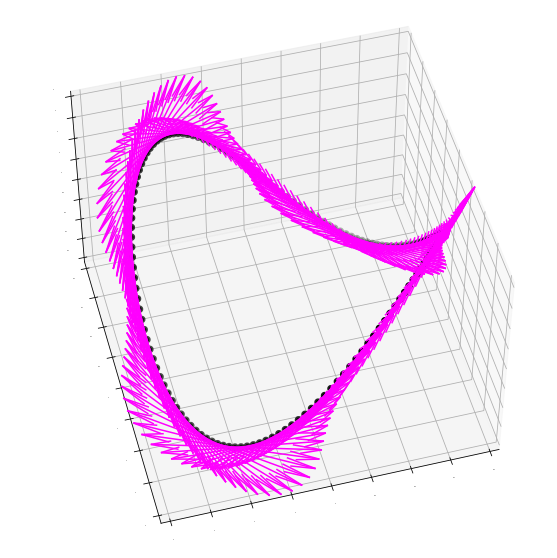

In [7]:
# Tangent bundle

gamma = 1

Tangent = np.zeros((N,np.shape(X_pca)[1]**2))
for i in range(0,N):
    v = (X_pca[(i+1)%N]-X_pca[i-1])/2
    v = v/np.linalg.norm(v)
    proj = velour.np.outer(v,v)
    Tangent[i] = proj.flatten()

Bundle = np.zeros((N, np.shape(X_pca)[1]+np.shape(X_pca)[1]**2))
for i in range(N):
    Bundle[i,:] = np.concatenate((X_pca[i], gamma*Tangent[i]))
    
# Plot bundle

velour.PlotPCA(Bundle)
velour.PlotVectorField(Bundle)

Rips Complex is of dimension 2 - 264231 simplices - 150 vertices. Filtration maximal value is 1.
Filtration maximal value is 0.4999999093431301.
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 12084 simplices - 158 vertices.


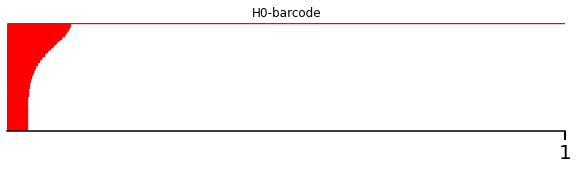

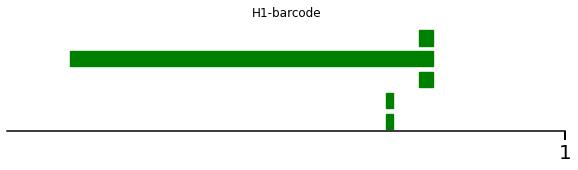

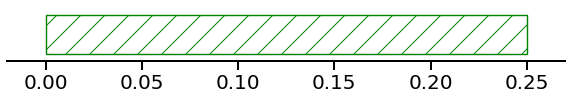

In [8]:
# Rips filtration

tmax = 1
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max)   #Rips filtration of X
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.01, homology_coeff_field=2, xticks = [tmax])         #persistence of Rips filtration

# Persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*5/10
Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max)   #computes the lifebar
velour.PlotLifebar(Lifebar, filtration_max)   

# Second dataset: giraffe and two trees

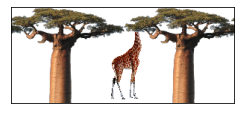

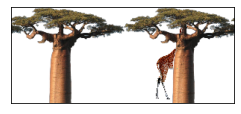

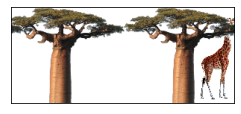

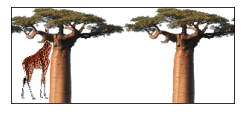

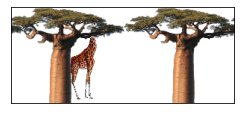

In [9]:
# Open dataset

X = np.load('Experiments/giraffe_trees.npy')
shape = tuple([130, 300, 3])
y = shape[0]; x = shape[1]
N = len(X)

# Plot some images of the dataset

for i in np.linspace(0, N, 6)[:-1]:
    i = int(i)
    plt.figure(figsize=(4,4))
    plt.imshow(X[i].reshape(shape))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)

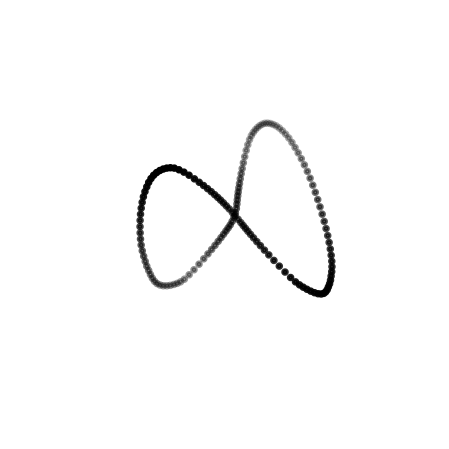

In [10]:
# PCA reduction

n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)

# Normalize

maximum = max([np.linalg.norm(X_pca[i]) for i in range(np.shape(X_pca)[0])])
X_pca = X_pca/maximum

# Plot

velour.PlotPointCloud(X_pca)

## First vector bundle: normal bundle

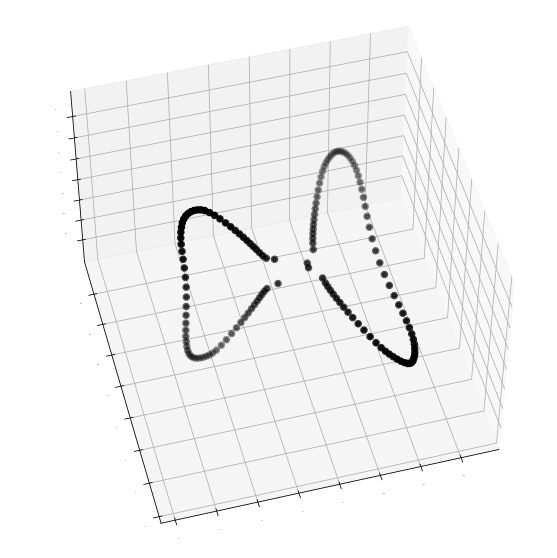

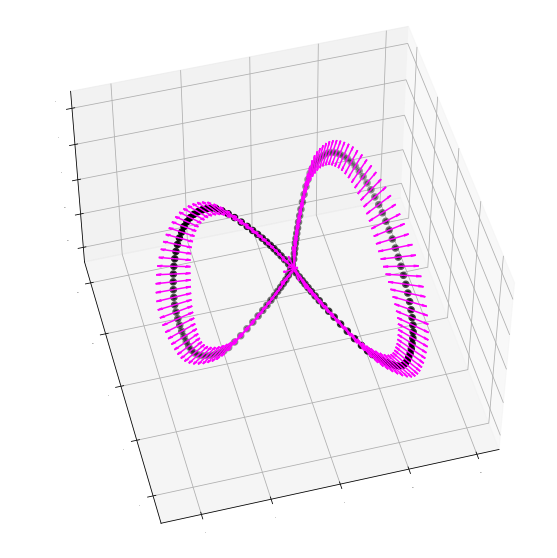

In [11]:
# Normal bundle

gamma = 0.5

Tangent = np.zeros((N,np.shape(X_pca)[1]**2))
for i in range(0,N):
    v = X_pca[i]
    v = v/np.linalg.norm(v)
    proj = velour.np.outer(v,v)
    Tangent[i] = proj.flatten()

Bundle = np.zeros((N, np.shape(X_pca)[1]+np.shape(X_pca)[1]**2))
for i in range(N):
    Bundle[i,:] = np.concatenate((X_pca[i], gamma*Tangent[i]))
    
# Plot bundle

velour.PlotPCA(Bundle)
velour.PlotVectorField(Bundle*5)

Rips Complex is of dimension 2 - 562625 simplices - 150 vertices. Filtration maximal value is 1.
Filtration maximal value is 0.24999995646119041.
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 24113 simplices - 158 vertices.


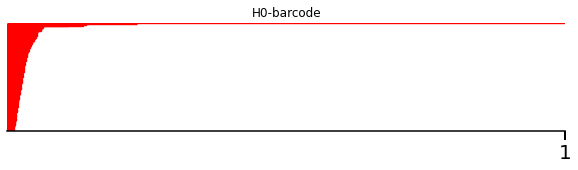

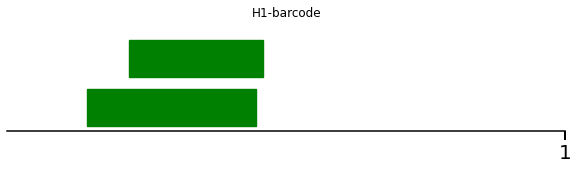

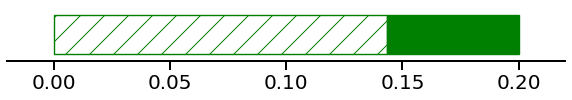

In [12]:
# Rips filtration

tmax = 1
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max) 
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.01, homology_coeff_field=2, xticks = [tmax])        

# Persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*8/10
Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max)  
velour.PlotLifebar(Lifebar, filtration_max)   

## Second vector bundle: tangent bundle

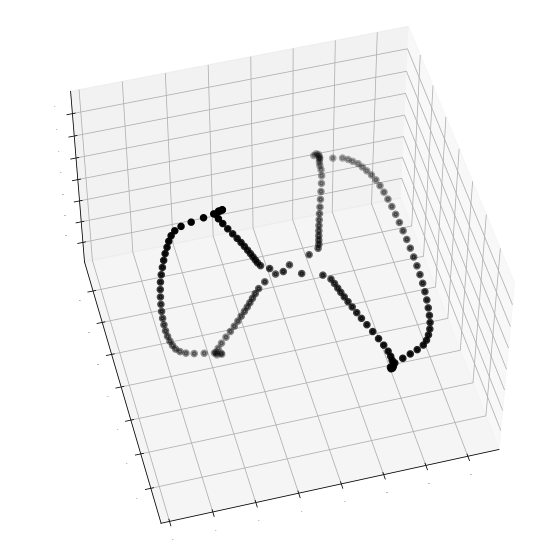

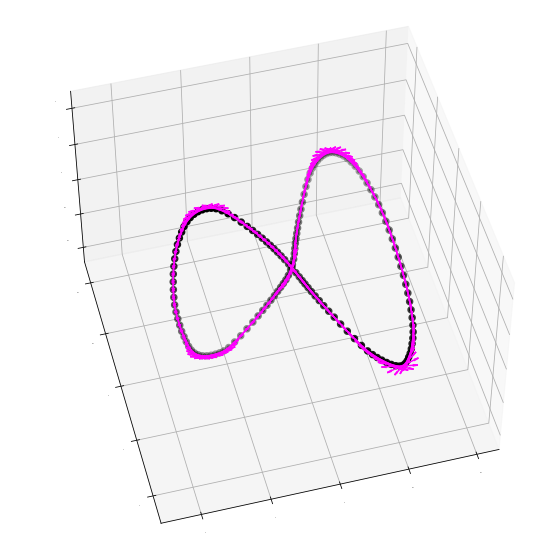

In [13]:
# Tangent bundle

gamma = 0.5

Tangent = np.zeros((N,np.shape(X_pca)[1]**2))
for i in range(0,N):
    v = (X_pca[(i+1)%N]-X_pca[i-1])/2
    v = v/np.linalg.norm(v)
    proj = velour.np.outer(v,v)
    Tangent[i] = proj.flatten()

Bundle = np.zeros((N, np.shape(X_pca)[1]+np.shape(X_pca)[1]**2))
for i in range(N):
    Bundle[i,:] = np.concatenate((X_pca[i], gamma*Tangent[i]))
    
# Plot bundle

velour.PlotPCA(Bundle)
velour.PlotVectorField(Bundle*5)

Rips Complex is of dimension 2 - 562625 simplices - 150 vertices. Filtration maximal value is 1.
Filtration maximal value is 0.24999995551133797.
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 10360 simplices - 158 vertices.


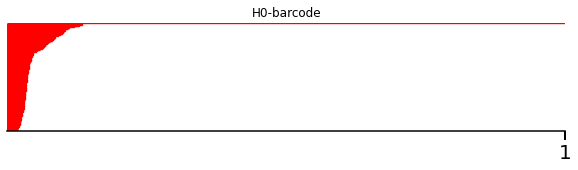

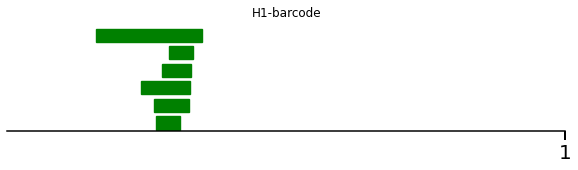

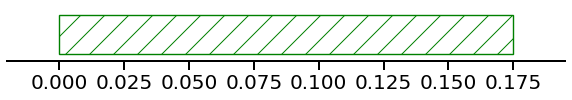

In [14]:
# Rips filtration

tmax = 1
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max)   #Rips filtration of X
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.01, homology_coeff_field=2, xticks = [tmax])         #persistence of Rips filtration

# Persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*7/10
Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max)   #computes the lifebar
velour.PlotLifebar(Lifebar, filtration_max)   

# Third dataset: Rotating cylinders

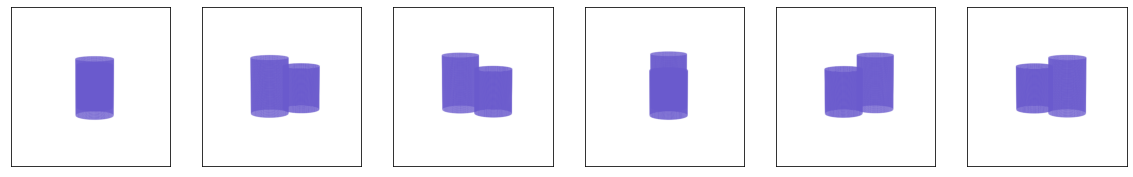

In [15]:
# Open dataset

X = np.load('Experiments/cylinders.npy')
shape = tuple([500, 500, 3])
y = shape[0]; x = shape[1]
N = len(X)

# Plot some images of the dataset

fig = plt.figure(figsize=(20,6))
axs = fig.subplots(1,6)
i_index = 0
for i in np.linspace(0, N, 7)[:-1]:
    i = int(i)
    ax = axs[i_index]
    ax.imshow(X[i].reshape(shape))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i_index += 1

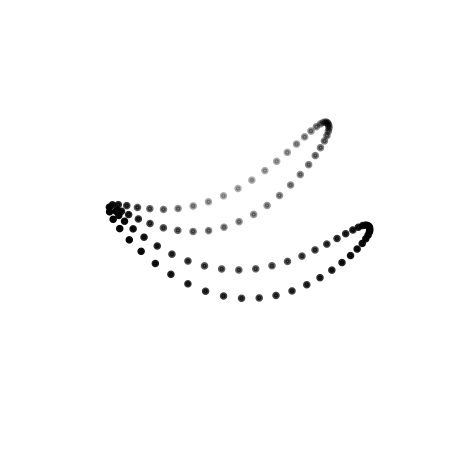

In [16]:
# PCA reduction

n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)

# Normalize

maximum = max([np.linalg.norm(X_pca[i]) for i in range(N)])
X_pca = X_pca/maximum

# Plot 

velour.PlotPointCloud(X_pca)

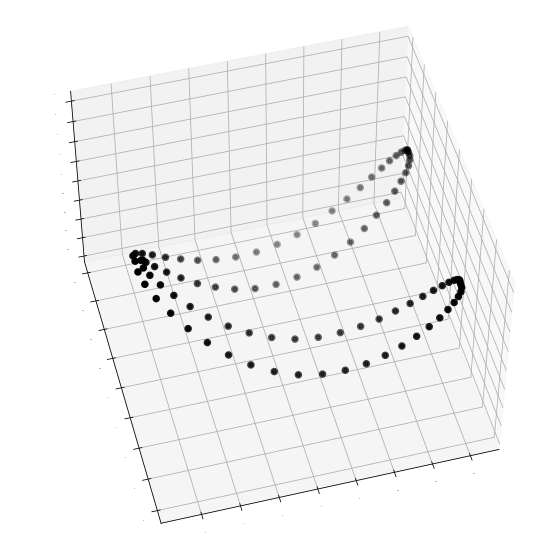

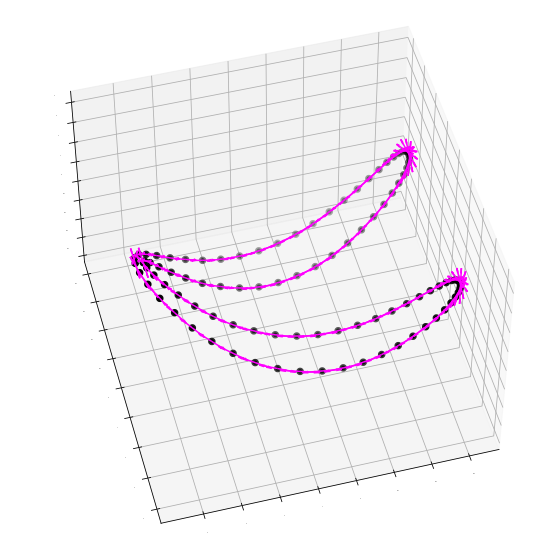

In [17]:
# Tangent bundle

gamma = 0.2

Tangent = np.zeros((N,np.shape(X_pca)[1]**2))
for i in range(0,N):
    v = (X_pca[(i+1)%N]-X_pca[i-1])/2
    v = v/np.linalg.norm(v)
    proj = velour.np.outer(v,v)
    Tangent[i] = proj.flatten()

Bundle = np.zeros((N, np.shape(X_pca)[1]+np.shape(X_pca)[1]**2))
for i in range(N):
    Bundle[i,:] = np.concatenate((X_pca[i], gamma*Tangent[i]))
    
# Plot bundle

velour.PlotPCA(Bundle)
velour.PlotVectorField(Bundle*5)

Rips Complex is of dimension 2 - 3536 simplices - 100 vertices. Filtration maximal value is 0.2.
Filtration maximal value is 0.09999999999999991.
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 1295 simplices - 108 vertices.


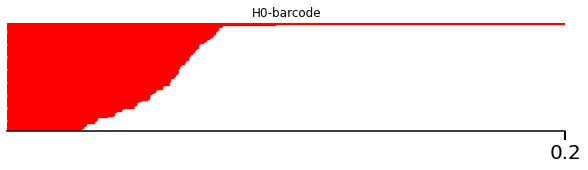

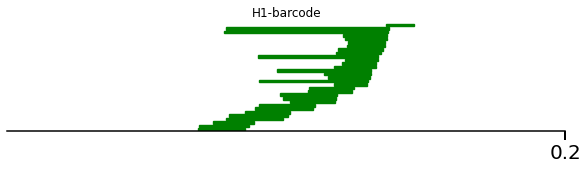

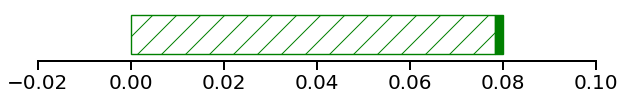

In [18]:
# Rips filtration

tmax = 0.2
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max)   #Rips filtration of X
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.01, homology_coeff_field=2, xticks = [tmax])         #persistence of Rips filtration

# Persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*8/10
Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max)   #computes the lifebar
velour.PlotLifebar(Lifebar, filtration_max)   

# Fourth dataset: gorilla on torus

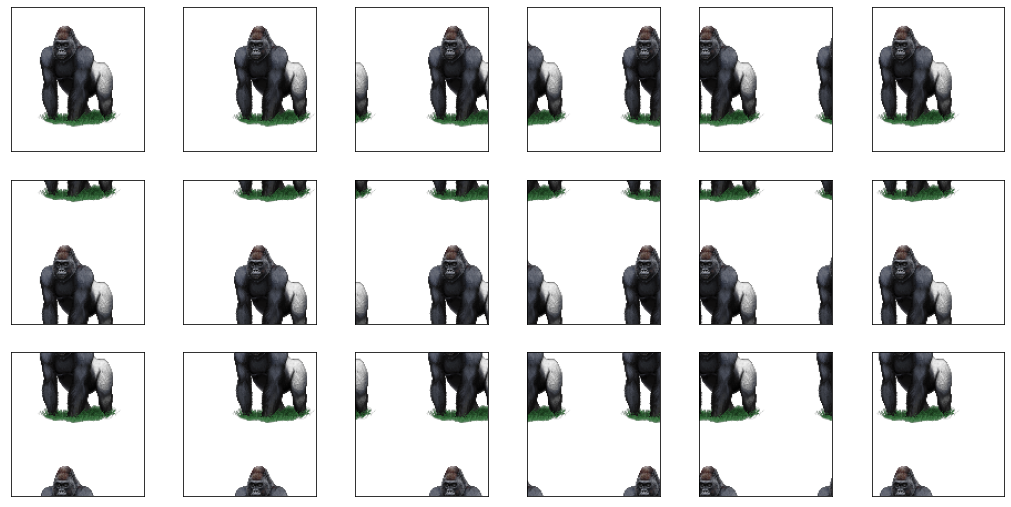

In [19]:
# Open dataset

X = np.load('Experiments/gorilla_torus.npy')
shape = tuple([130, 120, 3])
x = shape[0]; y = shape[1]
N1 = 65; N2 = 60
N = 3900
len_img = 46800

Y = X.reshape((N, len_img))

# Plot some images of the dataset

fig = plt.figure(figsize=(18,9))
axs = fig.subplots(3, 6)
j_index = 0
i_index = 0
for j in np.linspace(0, N2, 7)[:-1]:
    for i in np.linspace(0, N1, 4)[:-1]:
        j = int(j); i = int(i)
        ax = axs[i_index,j_index]
        ax.imshow(X[i,j].reshape(shape))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        i_index += 1
    j_index += 1
    i_index = 0

In [20]:
#PCA reduction

n_components = 4
pca = PCA(n_components=n_components)
pca.fit(Y)
Y_pca = pca.transform(Y)

# Normalize

maximum = max([np.linalg.norm(Y_pca[i]) for i in range(np.shape(Y_pca)[0])])
Y_pca = Y_pca/maximum

## First vector bundle: vertical tangent bundle

In [21]:
# Vertical tangent Bundle

gamma = 0.3

X_pca = Y_pca.reshape((N1,N2,n_components))

Tangent = np.zeros((N1,N2,n_components**2))
Bundle = np.zeros((N1,N2, n_components+n_components**2))

for i in range(N1):
    for j in range(N2):
        v = (X_pca[(i+1)%N1,j]-X_pca[i-1,j])/2
        v = v/np.linalg.norm(v)
        proj = velour.np.outer(v,v)
        Tangent[i,j] = proj.flatten()
        Bundle[i,j] = np.concatenate((X_pca[i,j], gamma*Tangent[i,j]))
        
Bundle = Bundle.reshape(N, n_components+n_components**2)

Rips Complex is of dimension 2 - 15104700 simplices - 3900 vertices. Filtration maximal value is 0.3.


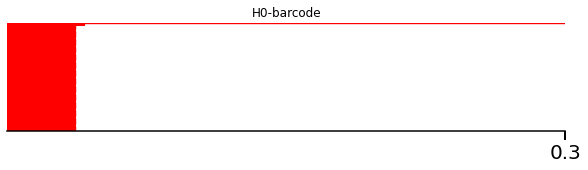

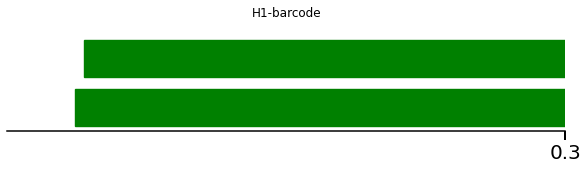

In [22]:
# Rips filtration

tmax = 0.3
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max)   
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.03, homology_coeff_field=2, xticks = [tmax])      

Filtration maximal value is 0.14999999999999983.
0.07499999999999991
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 341617 simplices - 3916 vertices.


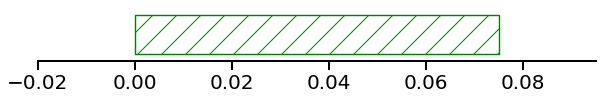

In [23]:
# First persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*5/10
print(filtration_max)

Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max)   #computes the lifebar
velour.PlotLifebar(Lifebar, filtration_max)     

## Second vector bundle: horizontal tangent bundle

In [24]:
# Horizontal tangent Bundle

gamma = 0.3

X_pca = Y_pca.reshape((N1,N2,n_components))

size = int(n_components**2)
Tangent = np.zeros((N1,N2,size))
Bundle = np.zeros((N1,N2, n_components+n_components**2))

for i in range(N1):
    for j in range(N2):
        v = (X_pca[i,(j+1)%N2]-X_pca[i,j-1])/2
        v = v/np.linalg.norm(v)
        proj = velour.np.outer(v,v)
        Tangent[i,j] = proj.flatten()
        Bundle[i,j] = np.concatenate((X_pca[i,j], gamma*Tangent[i,j]))
        
Bundle = Bundle.reshape(N, n_components+n_components**2)

Rips Complex is of dimension 2 - 17967300 simplices - 3900 vertices. Filtration maximal value is 0.3.


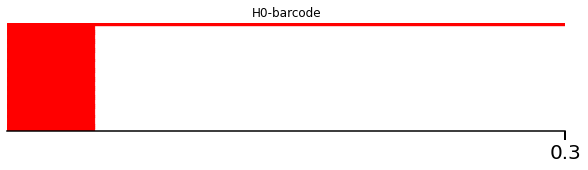

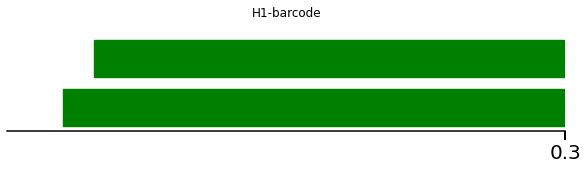

In [25]:
# Rips filtration

tmax = 0.3
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max)   
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.03, homology_coeff_field=2, xticks = [tmax])   

Filtration maximal value is 0.14999999999999988.
0.07499999999999994
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 340241 simplices - 3916 vertices.


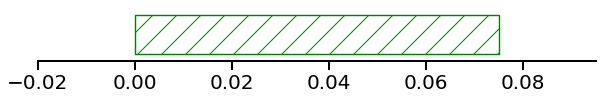

In [26]:
# First persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*5/10
print(filtration_max)

Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max)   #computes the lifebar
velour.PlotLifebar(Lifebar, filtration_max)    

# Fifth dataset: gorilla on Klein bottle

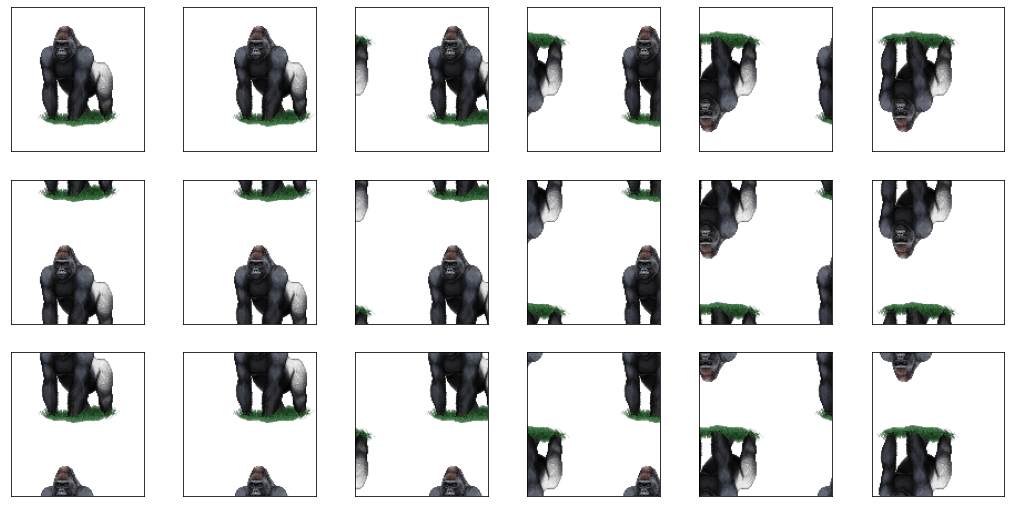

In [27]:
# Open dataset

X = np.load('Experiments/gorilla_Klein.npy')
shape = tuple([130, 120, 3])
x = shape[0]; y = shape[1]
N1 = 65; N2 = 60
N = 3900
len_img = 46800

Y = X.reshape((N, len_img))

# Plot some images of the dataset

fig = plt.figure(figsize=(18,9))
axs = fig.subplots(3, 6)
j_index = 0
i_index = 0
for j in np.linspace(0, N2, 7)[:-1]:
    for i in np.linspace(0, N1, 4)[:-1]:
        j = int(j); i = int(i)
        ax = axs[i_index,j_index]
        ax.imshow(X[i,j].reshape(shape))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        i_index += 1
    j_index += 1
    i_index = 0

In [28]:
#PCA reduction

n_components = 4
pca = PCA(n_components=n_components)
pca.fit(Y)
Y_pca = pca.transform(Y)

# Normalize

maximum = max([np.linalg.norm(Y_pca[i]) for i in range(np.shape(Y_pca)[0])])
Y_pca = Y_pca/maximum

## First vector bundle: vertical tangent bundle

In [29]:
# Vertical tangent Bundle

gamma = 0.3

X_pca = Y_pca.reshape((N1,N2,n_components))

size = int(n_components**2)
Tangent = np.zeros((N1,N2,size))
Bundle = np.zeros((N1,N2, n_components+n_components**2))

for i in range(N1):
    for j in range(N2):
        v = (X_pca[(i+1)%N1,j]-X_pca[i-1,j])/2
        v = v/np.linalg.norm(v)
        proj = velour.np.outer(v,v)
        Tangent[i,j] = proj.flatten()
        Bundle[i,j] = np.concatenate((X_pca[i,j], gamma*Tangent[i,j]))
        
Bundle = Bundle.reshape(N, n_components+n_components**2)

Rips Complex is of dimension 2 - 37589568 simplices - 3900 vertices. Filtration maximal value is 0.3.


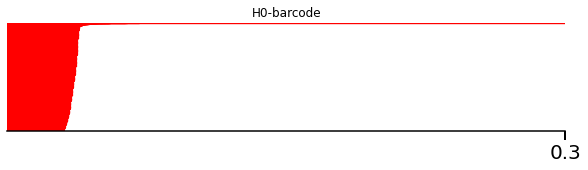

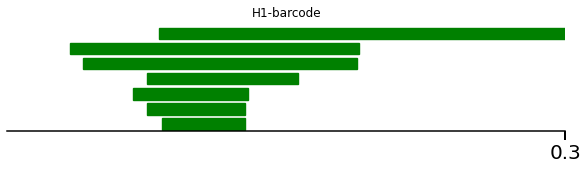

In [30]:
# Rips filtration

tmax = 0.3
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max)   #Rips filtration of X
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.03, homology_coeff_field=2, xticks = [tmax])         #persistence of Rips filtration

Filtration maximal value is 0.14999999999999983.
0.07499999999999991
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 637210 simplices - 3916 vertices.


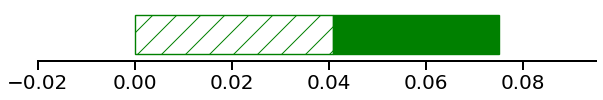

In [31]:
# First persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*5/10
print(filtration_max)

Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max)   #computes the lifebar
velour.PlotLifebar(Lifebar, filtration_max)     

## Second vector bundle: horizontal tangent bundle

In [32]:
# Horizontal tangent Bundle

gamma = 0.3

X_pca = Y_pca.reshape((N1,N2,n_components))

size = int(n_components**2)
Tangent = np.zeros((N1,N2,size))
Bundle = np.zeros((N1,N2, n_components+n_components**2))

for i in range(N1):
    for j in range(N2):
        v = (X_pca[i,(j+1)%N2]-X_pca[i,j-1])/2
        v = v/np.linalg.norm(v)
        proj = velour.np.outer(v,v)
        Tangent[i,j] = proj.flatten()
        Bundle[i,j] = np.concatenate((X_pca[i,j], gamma*Tangent[i,j]))
        
Bundle = Bundle.reshape(N, n_components+n_components**2)

Rips Complex is of dimension 2 - 34432699 simplices - 3900 vertices. Filtration maximal value is 0.3.


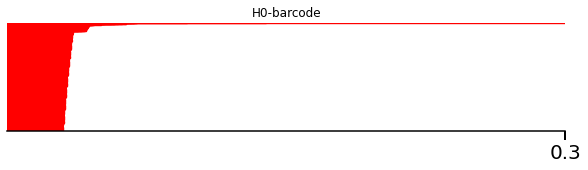

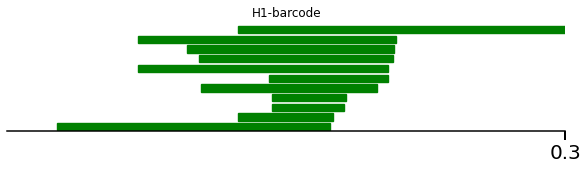

In [33]:
# Rips filtration

tmax = 0.3
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max)   #Rips filtration of X
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.03, homology_coeff_field=2, xticks = [tmax])         #persistence of Rips filtration

Filtration maximal value is 0.1499999999999998.
0.0749999999999999
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 675569 simplices - 3916 vertices.


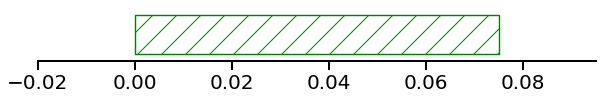

In [34]:
# First persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*5/10
print(filtration_max)

Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max)   #computes the lifebar
velour.PlotLifebar(Lifebar, filtration_max)     

# Sixth dataset: gorilla on projective plane

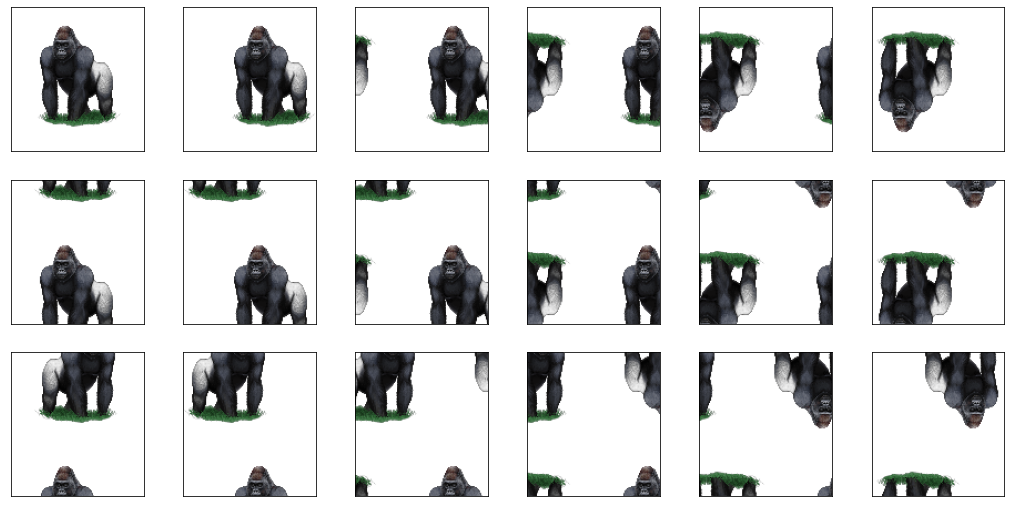

In [35]:
# Open dataset

X = np.load('Experiments/gorilla_projective.npy')
shape = tuple([130, 120, 3])
x = shape[0]; y = shape[1]
N1 = 65; N2 = 60
N = 3900
len_img = 46800

Y = X.reshape((N, len_img))

# Plot some images of the dataset

fig = plt.figure(figsize=(18,9))
axs = fig.subplots(3, 6)
j_index = 0
i_index = 0
for j in np.linspace(0, N2, 7)[:-1]:
    for i in np.linspace(0, N1, 4)[:-1]:
        j = int(j); i = int(i)
        ax = axs[i_index,j_index]
        ax.imshow(X[i,j].reshape(shape))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        i_index += 1
    j_index += 1
    i_index = 0

In [36]:
#PCA reduction

n_components = 4
pca = PCA(n_components=n_components)
pca.fit(Y)
Y_pca = pca.transform(Y)

# Normalize

maximum = max([np.linalg.norm(Y_pca[i]) for i in range(np.shape(Y_pca)[0])])
Y_pca = Y_pca/maximum

## First vector bundle: vertical tangent bundle

In [37]:
# Vertical tangent Bundle

gamma = 0.3

X_pca = Y_pca.reshape((N1,N2,n_components))

Tangent = np.zeros((N1,N2,n_components**2))
Bundle = np.zeros((N1,N2, n_components+n_components**2))

for i in range(N1):
    for j in range(N2):
        v = (X_pca[(i+1)%N1,j]-X_pca[i-1,j])/2
        v = v/np.linalg.norm(v)
        proj = velour.np.outer(v,v)
        Tangent[i,j] = proj.flatten()
        Bundle[i,j] = np.concatenate((X_pca[i,j], gamma*Tangent[i,j]))
        
Bundle = Bundle.reshape(N, n_components+n_components**2)

Rips Complex is of dimension 2 - 43816276 simplices - 3900 vertices. Filtration maximal value is 0.3.


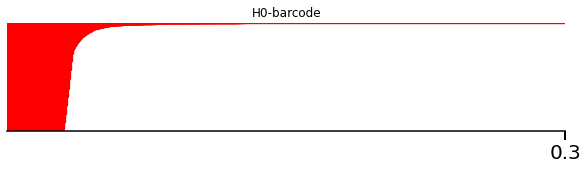

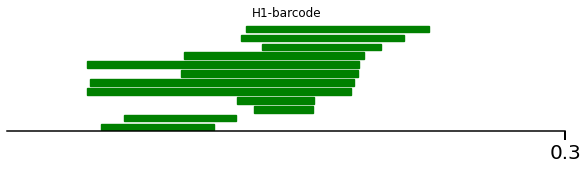

In [38]:
# Rips filtration

tmax = 0.3
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max) 
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.03, homology_coeff_field=2, xticks = [tmax])  

Filtration maximal value is 0.1499999999999998.
0.0749999999999999
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 593284 simplices - 3916 vertices.


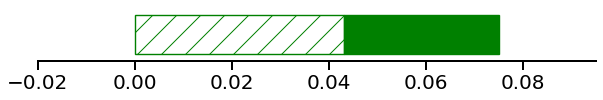

In [39]:
# First persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*5/10
print(filtration_max)

Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max)   
velour.PlotLifebar(Lifebar, filtration_max)     

## Second vector bundle: horizontal tangent bundle

In [40]:
# Horizontal tangent Bundle

gamma = 0.3

X_pca = Y_pca.reshape((N1,N2,n_components))

Tangent = np.zeros((N1,N2,n_components**2))
Bundle = np.zeros((N1,N2, n_components+n_components**2))

for i in range(N1):
    for j in range(N2):
        v = (X_pca[i,(j+1)%N2]-X_pca[i,j-1])/2
        v = v/np.linalg.norm(v)
        proj = velour.np.outer(v,v)
        Tangent[i,j] = proj.flatten()
        Bundle[i,j] = np.concatenate((X_pca[i,j], gamma*Tangent[i,j]))
        
Bundle = Bundle.reshape(N, n_components+n_components**2)

Rips Complex is of dimension 2 - 42214983 simplices - 3900 vertices. Filtration maximal value is 0.3.


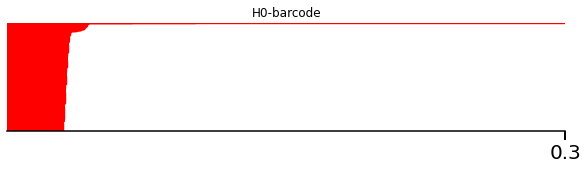

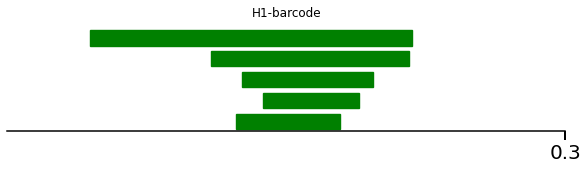

In [41]:
# Rips filtration

tmax = 0.3
dimension_max = 2  
st = velour.RipsComplex(Bundle, filtration_max = tmax, dimension_max = dimension_max)  
velour.PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.03, homology_coeff_field=2, xticks = [tmax])        

Filtration maximal value is 0.14999999999999977.
0.07499999999999989
The map satisfies the weak star condition.
Mapping Cone Complex is of dimension 5 - 756180 simplices - 3916 vertices.


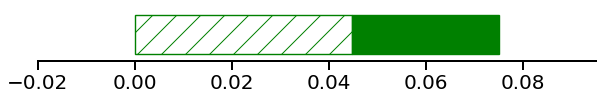

In [42]:
# First persistent Stiefel-Whitney class

filtration_max = velour.BundleFiltrationMaximalValue(Bundle,filtration = 'Rips')
filtration_max = filtration_max*5/10
print(filtration_max)

Lifebar = velour.ComputeLifebar(st, Bundle, filtration_max=filtration_max)   #computes the lifebar
velour.PlotLifebar(Lifebar, filtration_max)     

# Code to generate datasets

## First dataset

In [ ]:
# Generate dataset

pas = 3
file = "./Experiments/giraffe.png"
pic = plt.imread(file)
pic = pic[::pas,::pas,0:3]
pic = pic[1:151,25:325,:]

x = np.shape(pic)[0]
y = np.shape(pic)[1]

y2 = int(y/2)
X = []
for i in range(y2):
        pic2 = np.roll(pic, 2*i, 1)
        X.append(pic2.flatten())

# Save dataset

np.save('Experiments/giraffe.npy', X)

## Second dataset

In [ ]:
# Generates dataset

pas = 3
file = "./Experiments/giraffe.png"
pic = plt.imread(file)
pic = pic[::pas,::pas,:3]
pic = pic[4:150,25:325,:]

x = np.shape(pic)[0]
y = np.shape(pic)[1]

file = "./Experiments/tree.png"
tree = plt.imread(file)
tree = tree[::pas,::pas,:3]
tree = tree[4:151,25:325,:]
tree0 = np.roll(tree, -75, 1)
tree1 = np.roll(tree, 90, 1)
background = tree0
s = 0.99
background[tree1<s] = tree1[tree1<s]
background_ind = background<s

X = []
y2 = int(y/2)
for i in range(y2):
        pic2 = np.roll(pic, 2*i, 1)
        pic2[background_ind] = background[background_ind]
        X.append(pic2.flatten())

# Save dataset

np.save('Experiments/giraffe_trees.npy', X)

## Third dataset

In [ ]:
# Generates dataset

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 100)
    theta = np.linspace(0, 2*np.pi, 100)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

def GenerateImage(theta2=0):
    center_x = 0
    center_y = 0
    radius = 1
    height_z = 1

    fig = plt.figure(1, figsize=(1,1), dpi=500)
    ax = fig.gca(projection='3d')
    canvas = FigureCanvas(fig)

    x_grid,y_grid,z_grid = data_for_cylinder_along_z(1,center_y,radius,height_z)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.9,  rstride=1, cstride=1, linewidth=0, shade = False, color = 'slateblue')#indigo
    x_grid,y_grid,z_grid = data_for_cylinder_along_z(-1,center_y,radius,height_z*0.8)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=1,  rstride=1, cstride=1, linewidth=0, shade = False, color = 'slateblue')

    plt.axis('off')
    ax.xaxis.set_tick_params(labelsize=0)
    ax.yaxis.set_tick_params(labelsize=0)
    ax.zaxis.set_tick_params(labelsize=0)

    ax.set_xlim3d((-2*radius,2*radius))
    ax.set_ylim3d((-2*radius,2*radius))
    ax.set_zlim3d((-0,height_z))
    theta1 = 10
    ax.view_init(theta1, theta2) 

    canvas.draw()
    pic = np.fromstring(canvas.tostring_rgb(), dtype='uint8')
    plt.close(1)
    return pic

N = 100
X = []
for theta2 in np.linspace(0,360,N+1)[0:-1]:
    print(repr(theta2/360), end = '\r')
    pic = GenerateImage(theta2)
    X.append(pic)
    
# Save dataset

np.save('Experiments/cylinders.npy', X)

## Fourth dataset

In [ ]:
# Generates dataset

pas = 7
file = "./Experiments/gorilla.png"
pic = plt.imread(file)
pic = pic[::pas,::pas,0:3]
pic = pic[7:137,9:130]

shape = np.shape(pic)
x = np.shape(pic)[0]
y = np.shape(pic)[1]

X = []
x2 = int(x/2)
y2 = int(y/2)
X = np.zeros((x2,y2,x*y*3))
for i in range(x2):
    for j in range(y2):
        pic2 = np.roll(pic, 2*i, 0)
        pic2 = np.roll(pic2, 2*j, 1)
        X[i,j] = pic2.flatten()

# Save dataset

np.save('Experiments/gorilla_torus.npy', X)

## Fifth dataset

In [ ]:
# Generates dataset

pas = 7
file = "./Experiments/gorilla.png"
pic = plt.imread(file)
pic = pic[::pas,::pas,0:3]
pic = pic[7:137,9:130]

shape = np.shape(pic)
x = np.shape(pic)[0]
y = np.shape(pic)[1]

X = []
x2 = int(x/2)
y2 = int(y/2)
X = np.zeros((x2,y2,x*y*3))
for i in range(x2):
    for j in range(y2):
        pic2 = np.roll(pic, 2*j, 1)
        pic2 = np.roll(pic2, 2*i, 0)
        pic2[:,0:2*j] = np.flip(pic2[:,0:2*j],0)
        X[i,j] = pic2.flatten()
        
# Save dataset

np.save('Experiments/gorilla_Klein.npy', X)

## Sixth dataset

In [ ]:
# Generates dataset

pas = 7
file = "./Experiments/gorilla.png"
pic = plt.imread(file)
pic = pic[::pas,::pas,0:3]
pic = pic[7:137,9:130]

shape = np.shape(pic)
x = np.shape(pic)[0]
y = np.shape(pic)[1]

X = []
x2 = int(x/2)
y2 = int(y/2)
X = np.zeros((x2,y2,x*y*3))
for i in range(x2):
    for j in range(y2):
        pic2 = np.roll(pic, 2*j, 1)
        pic2[:,0:2*j] = np.flip(pic2[:,0:2*j],0)
        pic2 = np.roll(pic2, 2*i, 0)
        pic2[0:2*i,:] = np.flip(pic2[0:2*i,:],1)
        X[i,j] = pic2.flatten()
        
# Save dataset

np.save('Experiments/gorilla_projective.npy', X)